# Modeling Exericses

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from mpl_toolkits import mplot3d

%matplotlib inline

import env
import viz

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

1. Clustering with the Iris Dataset
    - Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
url = env.get_db_url('iris_db')

iris = pd.read_sql('''
SELECT *
FROM measurements
JOIN species
USING(species_id)''',url)

iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


A. Choose features other than the ones used in the lesson.

In [3]:
X = iris[['petal_width','sepal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

iris['cluster'] = kmeans.predict(X)

B. Visualize the results of your clustering.

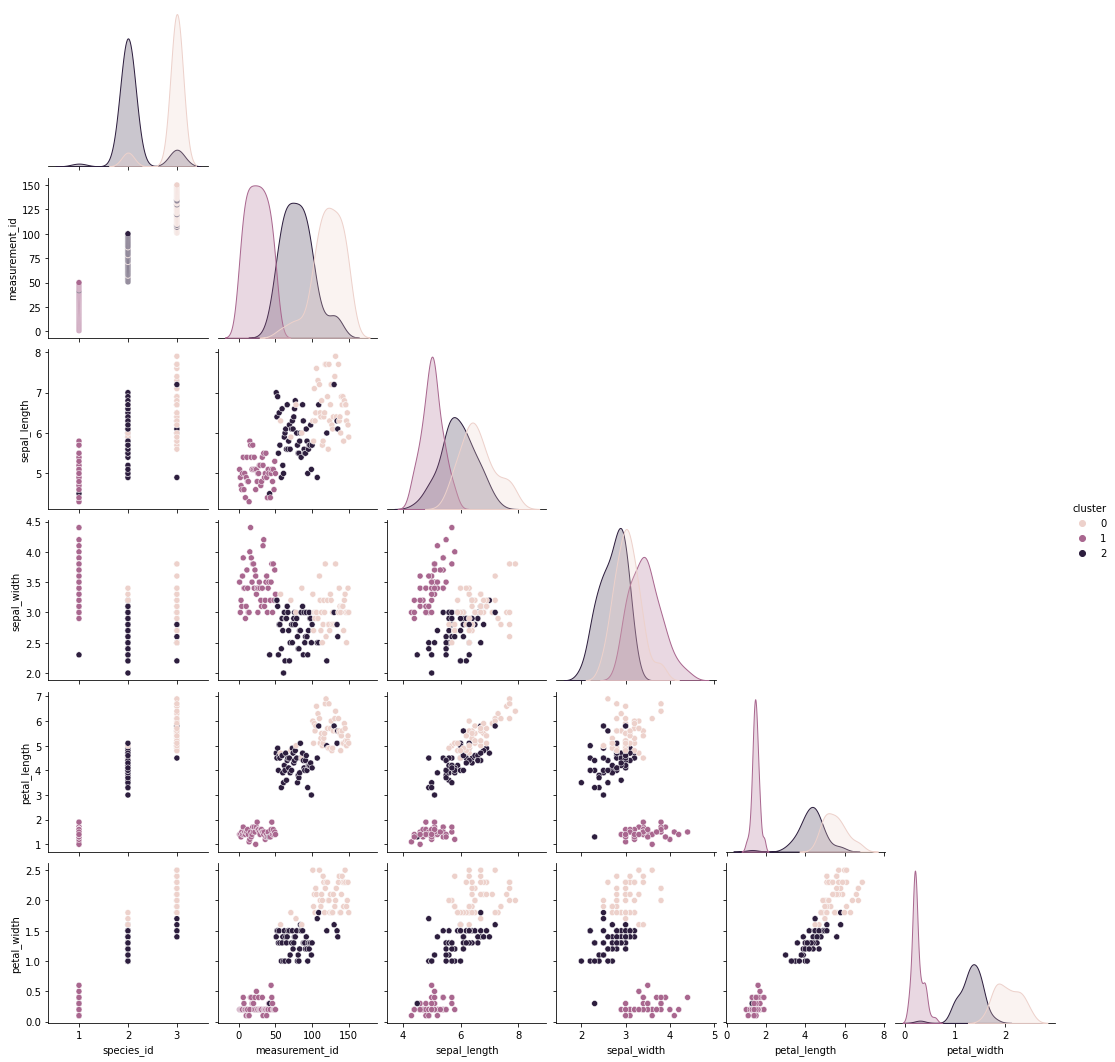

In [4]:
sns.pairplot(data=iris,hue='cluster',kind='scatter',corner =True)
plt.show()

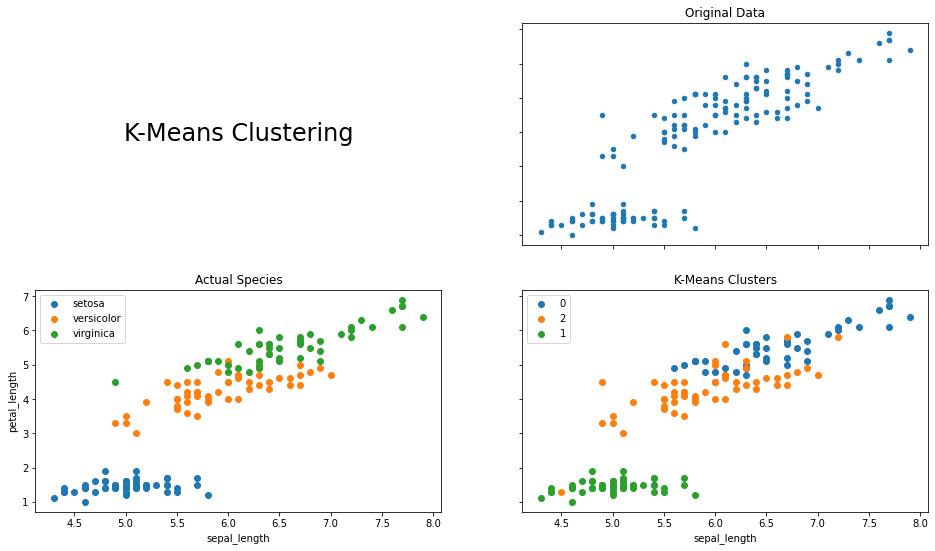

In [5]:
# Imported from lesson viz.py
viz.clustering_example1(iris)

C. Use the elbow method to visually select a good value for k.

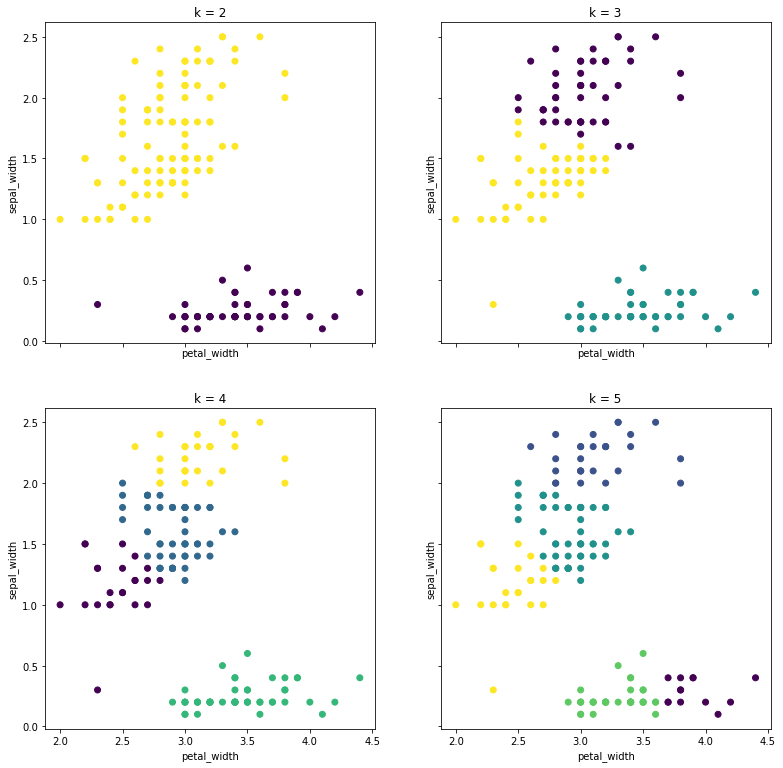

In [6]:
# From lesson (spend time to understand - zip,ravel)
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal_width', ylabel='sepal_width')

D. Repeat the clustering, this time with 3 different features.

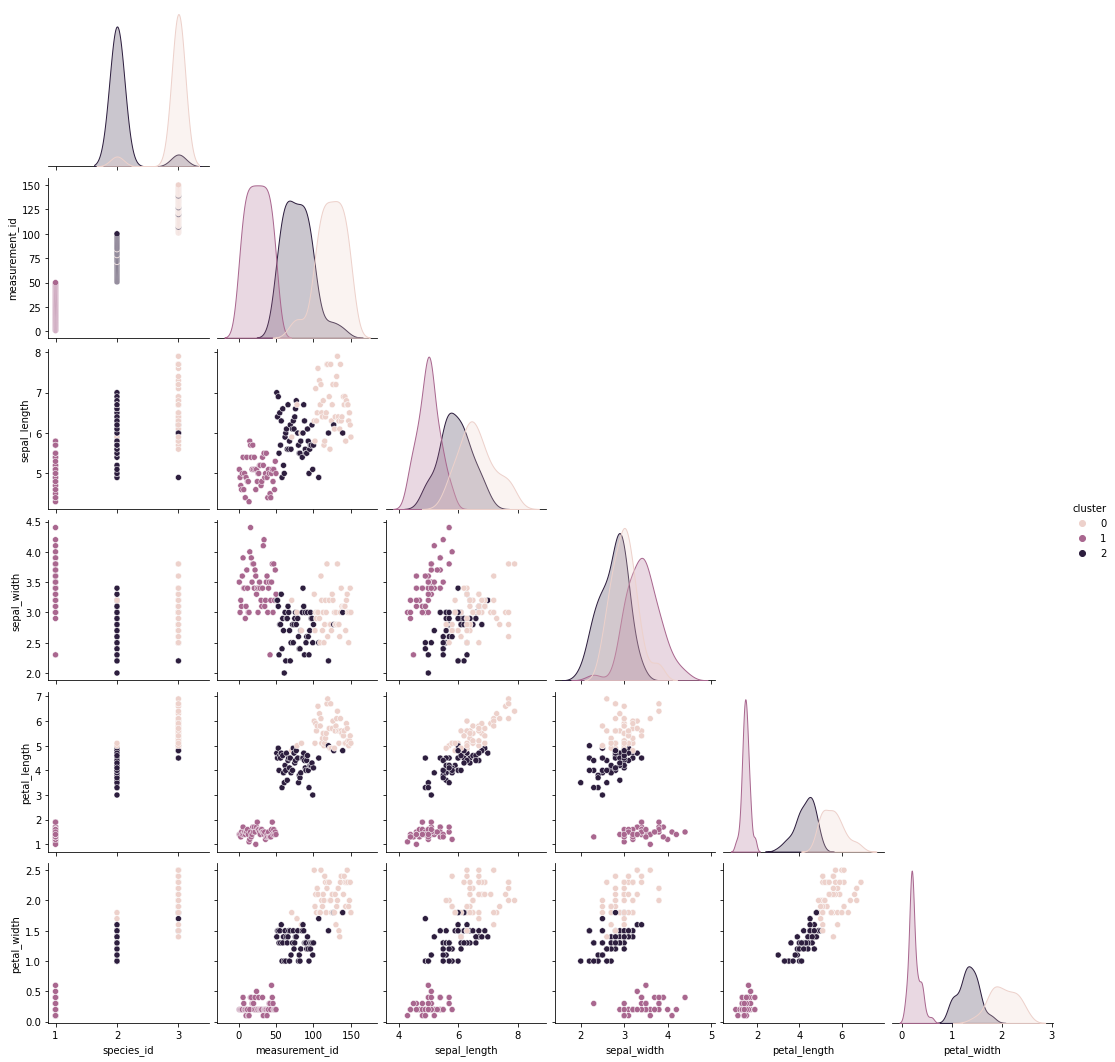

In [7]:
X = iris[['petal_length','petal_width','sepal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

iris['cluster'] = kmeans.predict(X)

sns.pairplot(data=iris,hue='cluster',kind='scatter',corner =True)
plt.show()

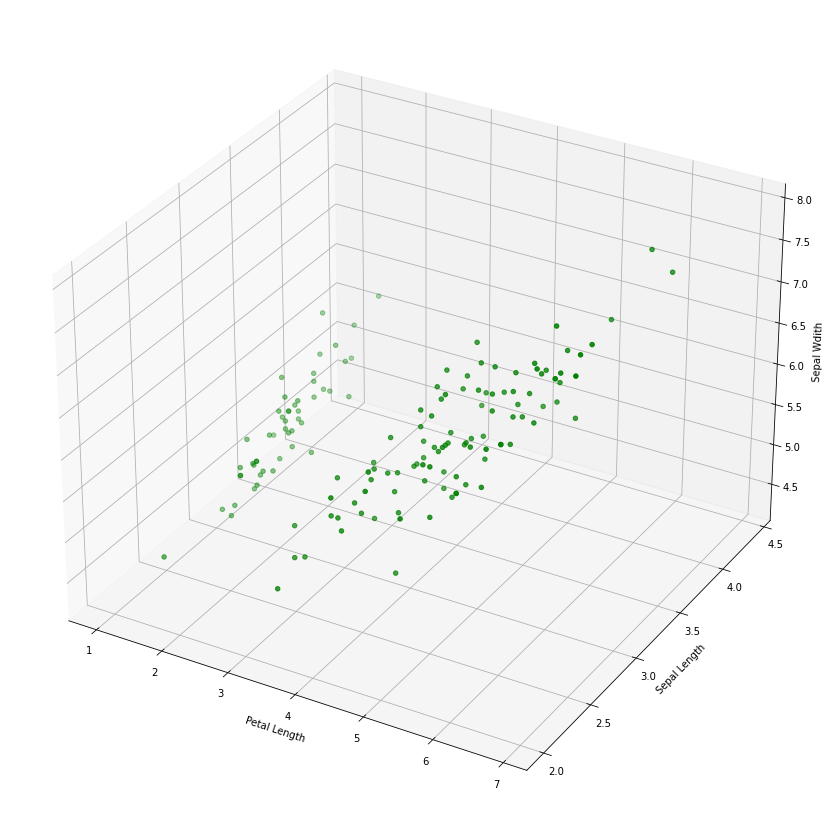

In [8]:
# 3d plot (Figure it out)
fig = plt.figure(figsize = (30,15))
ax = plt.axes(projection='3d')
              
xdata = iris.petal_length
ydata = iris.sepal_length
zdata = iris.sepal_width

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Sepal Wdith')

ax.scatter3D(xdata,zdata,ydata,color='green');

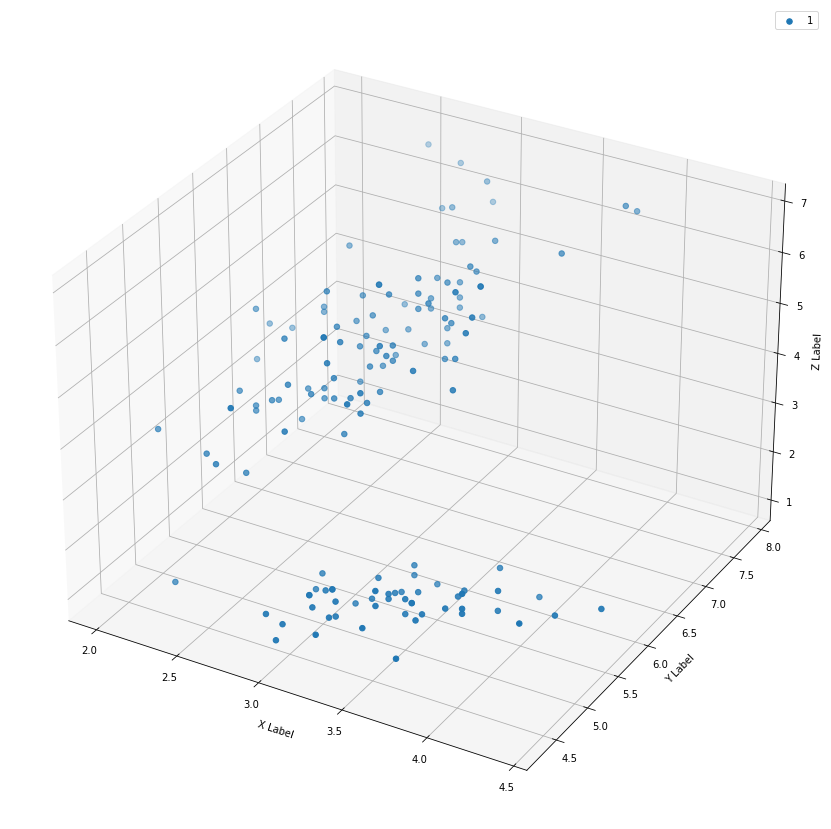

In [10]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

dim = ['sepal_width','sepal_length','petal_lenght']


xs = iris.sepal_width
ys = iris.sepal_length
zs = iris.petal_length
ax.scatter(xs, ys, zs, s=30)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(iris.cluster)
plt.show()

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [11]:
url = env.get_db_url('mall_customers')

mall = pd.read_sql('''
SELECT *
FROM customers''', url)

mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


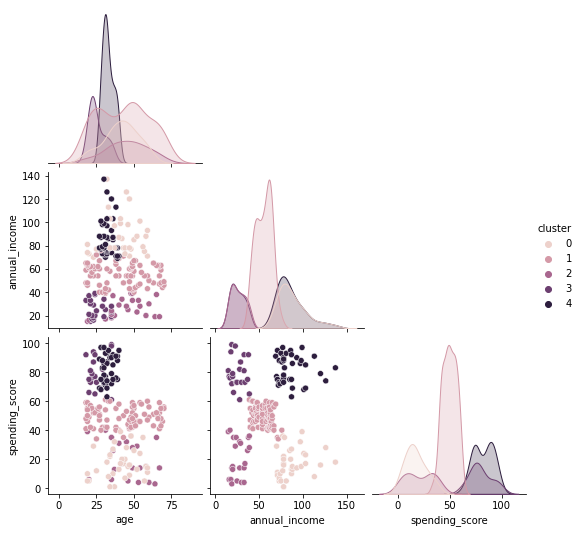

In [33]:
X = mall[['annual_income','spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

mall['cluster'] = kmeans.predict(X)

sns.pairplot(data=mall[['age','annual_income','spending_score','cluster']],hue='cluster',kind='scatter',corner =True)
plt.show()

3. How does scaling impact the results of clustering?

    - Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in         the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [23]:
from sklearn.preprocessing import MinMaxScaler

col = ['age','annual_income','spending_score']

mall_scaled = mall[col]

minmax = MinMaxScaler()
minmax.fit(mall[col])

mall_scaled[col] = minmax.transform(mall[col])

mall_scaled.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


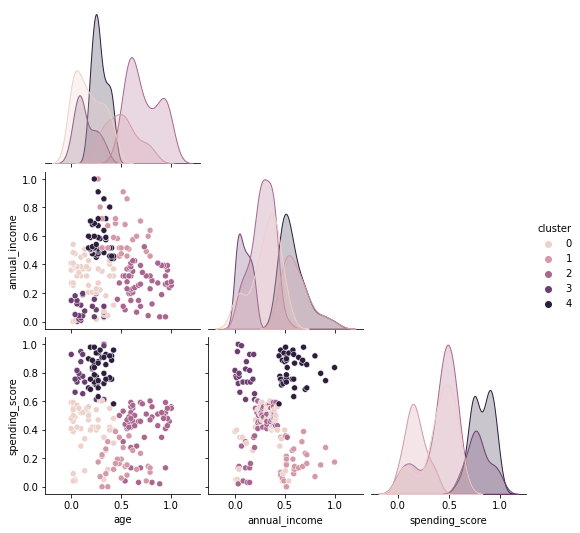

In [30]:
X = mall_scaled[['age','annual_income','spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

mall_scaled['cluster'] = kmeans.predict(X)

sns.pairplot(data=mall_scaled,hue='cluster',kind='scatter',corner =True)
plt.show()

Bonus 
A) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [36]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'

csv_export_url = sheet_url.replace('/edit', '/export?format=csv')

df = pd.read_csv(csv_export_url)
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


B) Visualize the data and guess the number and shape of the clusters.

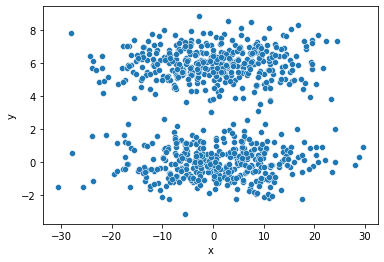

In [38]:
sns.scatterplot(x='x',y='y',data=df)
plt.show()

- Guessing 2 clusters

C) Implement the KMeans algorithm on unscaled data and visualize the clusters.

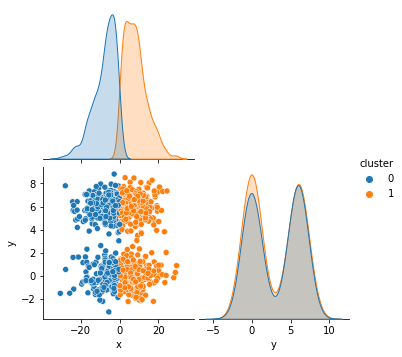

In [39]:
X = df
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.predict(X)

df['cluster'] = kmeans.predict(X)

sns.pairplot(data=df,hue='cluster',kind='scatter',corner =True)
plt.show()

D) Repeat the step above but with scaled data.

In [43]:
from sklearn.preprocessing import MinMaxScaler
col = ['x','y']
df_scaled = df[col]

minmax = MinMaxScaler()
minmax.fit(df[col])

df_scaled[col] = minmax.transform(df[col])

df_scaled.head()

,x,y
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807


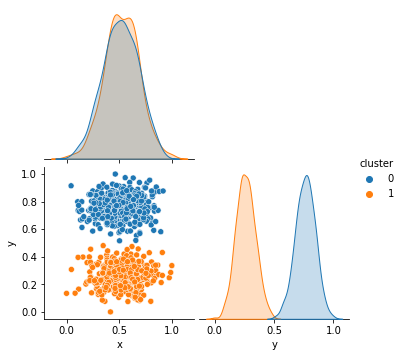

In [45]:
X = df_scaled
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.predict(X)

df_scaled['cluster'] = kmeans.predict(X)

sns.pairplot(data=df_scaled,hue='cluster',kind='scatter',corner =True)
plt.show()

C) Write down the takeaways from this exercise.

- Changing the scale of the data changed how the algorithm clustered the data. When the x axis had a range from -20 to 20 the data was clustered incorrectly but when the axis was scaled the algorithm picked up on the two actual clusters. Unscaled it was split down the y axis where x = 0 as the distance from zero in the positive and negative were the same either way. When it was scaled it was split along the x axis around 0.5(scaled). This better showed the top and bottom clusters.